In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Nessa parte nos vamos explicar tudo que nos precisamos da NETWORKX,
mas tambem recomendo muito entrar nesse link, ele explica muito bem como tudos funcionam. 

    https://networkx.org/documentation/stable/reference/introduction.html

1 - Criando Um Grafo

2 - Caminhando Pelo Grafo 

3 - Diferentes Caminhos

4 - Astar Path 
4

In [44]:
def visualiza(G):
    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G)

    node_colors = ['#FFB6C1' for _ in G.nodes] 
    edge_colors = ["#8AB6E0" for _ in G.edges] 

    pesos = nx.get_edge_attributes(G, 'weight')
    plt.rcParams['font.family'] = 'Comic Sans MS' 

    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors, linewidths=1.5)

    nx.draw_networkx_edges( G, pos, width= 8, edge_color=edge_colors, arrows=False, arrowstyle='-|>', )
    nx.draw_networkx_labels(G, pos, font_size=14,  font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=pesos, font_size=10, label_pos=0.5)

    plt.title("Grafo", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

#### 1 - Criando Um Grafo

Primeiro, o que é um **grafo?**
Na minha opiniao, é uma rede que ajuda a a mostrar **relacionamentos** entre **entidades**. 
- **Arestas** mostram esse relacionamento 
- **Vetices** representam a entidade 

No networx voce cria um grafo assim: 

#### **G(V,E)**

In [45]:
G = nx.Graph()

Como cria um V - vertices ou nodos: 

In [46]:
for v in range(10):
    G.add_node(v)

Como criar/ adicionar uma E - edge --> cada aresta representa um relacionamento entre dois nodos (a,b) = (a)--(b)

visualiza(G) é uma funcao/metodo q eu criei para visulizar melhor o grafo 

/var/folders/p7/0851733d62n048k3b8qcg4tm0000gn/T/ipykernel_20928/4024936115.py:13: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges( G, pos, width= 8, edge_color=edge_colors, arrows=False, arrowstyle='-|>', )


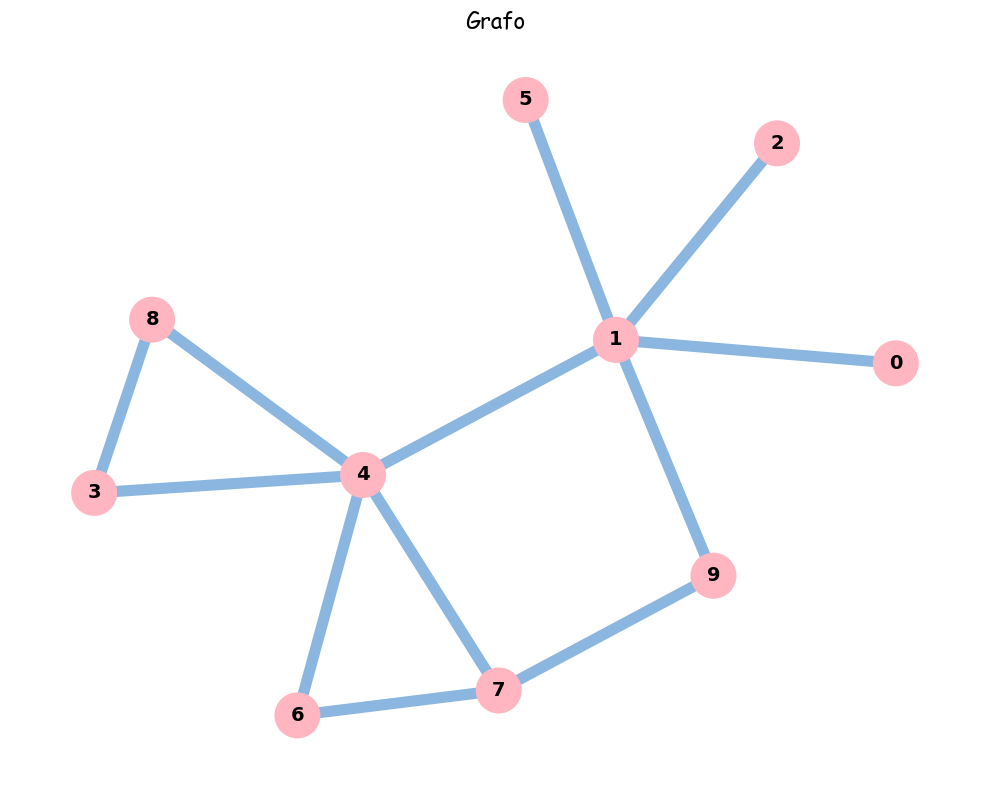

In [47]:

G.add_edge(0, 1)
G.add_edge(1, 2)  
G.add_edge(1, 5)  
G.add_edge(3, 8)
G.add_edge(3, 4)
G.add_edge(4, 7)
G.add_edge(4, 6)
G.add_edge(4, 1)
G.add_edge(6, 7)
G.add_edge(4, 8)
G.add_edge(1, 9)
G.add_edge(9, 7)

visualiza(G)

#### 2 - Caminhando Pelo Grafo 

- ##### Busca em Profundidade **DFS** -> Depth-First Search
Explora o máximo possível (ate o fim) em um ramo antes de voltar para os outros caminhos.

-> Algoritimo:

--> Visita o nó inicial

--> Escolhe um vizinho não visitado e repete o processo

--> Quando não há mais vizinhos não visitados, volta.

    Bom para: checar se é um grafo conecxo e para ordenação
    Ruimpara: grafos muito profundos

-> DFS Iterativo - pilha em vez de recursão.

    Bom para: evitar stack overflow, ter mais controle 

Ordem no nosso exemplo: A → C → F → B → E → D

-> DLS - Busca em Profundidade Limitada - DFS com limite máximo de profundidade.

    Bom para: quando sabemos que a solução qual a profundidade maxima q o nodo esta 



- ##### Busca em Largura **BFS** -> Breadth-First Search
Explora todos os vértices no mesmo nível antes de avançar para os níveis mais profundos.

--> Visita o nó inicial

--> Visita todos os vizinhos diretos do nó inicial

--> Visita os vizinhos dos vizinhos (segundo nível)

--> Continua até visitar todos os nós

    Bom para: grafos não ponderados e quando eu sei q o caminho é curto


- ##### Dijkstra -> Encontrar o caminho mais curto em um grafo com pesos não negativos

--> Funcionamento básico:

--> Mantém um conjunto de nós não visitados e suas distâncias temporárias.

--> Sempre expande o nó mais próximo ainda não processado.

--> Atualiza as distâncias dos vizinhos se encontrar um caminho melhor.


### Nós escolhemos o Algoritmo A (A-star):

Ele combina o Dijkstra com Heurística:

--> Custo real do caminho percorrido (como o Dijkstra).

--> Heurística admissível (estimativa inteligente da distância até o objetivo).

Heurísticas Comuns
1. Distância de Manhattan (Para movimentação em 4 direções: cima, baixo, esquerda, direita)
Fórmula:
h(n) = |x₁ - x₂| + |y₁ - y₂|

Melhor para grids onde só se pode mover na horizontal/vertical (ex.: robôs em armazéns).

In [48]:
from typing import Iterator, Protocol, Tuple

Nos utilizamos o **Astar Path**(G, source, target, heuristic=None, weight='weight', *, cutoff=None)[source]

Ele retorna ula lista do caminho mais curto de um nodo ate o outro usando o algoritimo **A* (“A-star”) algorithm**

##### funcoes: 

**Heuristic:**
Estima a distacia do porto ate o proximo porto ate 
ele recebe as cordenadas dos portos e retorna um numero que é a distancia estimada 

**weight:**
Se o grafo for um grafo valorado eles terao um peso atribuido as arestas, que serao acessados usando a uma key. Se nenhuma for adicionada altomaticamente se torna 1. 

**cutoff:**
é um float que tambem é opcional significa o custo maximo ate chegar no outro porto, se passqr desse valor, ele só vai ignirar esse nodo, é representado pela formula g(n) + h’(n) > cutoff
